In [1]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [2]:
import os

os.listdir("PINS")

['pins_Aaron Paul',
 'pins_alexandra daddario',
 'pins_Alvaro Morte',
 'pins_alycia debnam carey face',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_amber heard face',
 'pins_Anna Gunn',
 'pins_anne hathaway',
 'pins_barbara palvin face',
 'pins_bellamy blake face',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_bill gates',
 'pins_Brenton Thwaites',
 'pins_brie larson',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_chadwick boseman face',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_david mazouz',
 'pins_Dominic Purcell',
 'pins_drake',
 'pins_dua lipa face',
 'pins_Dwayne Johnson',
 'pins_eliza taylor',
 'pins_elizabeth olsen face',
 'pins_elon musk',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_emma watson face',
 'pins_gal gadot face',
 'pins_grant gustin face',
 'pins_Gwyneth P

In [3]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
    def to_dict(self):
        return {
            'base': self.base,
            'name': self.name,
            'file': self.file,
        }
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for j in os.listdir(os.path.join(path, i)):
            path_c = os.path.splitext(j)[1]
            if path_c == '.jpg' or path_c == '.jpeg':
                metadata.append(IdentityMetadata(path, i, j))
    return np.array(metadata)

metadata = load_metadata('PINS')

In [4]:
print (metadata.shape)

(10770,)


In [5]:
print (metadata.size)

10770


In [6]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

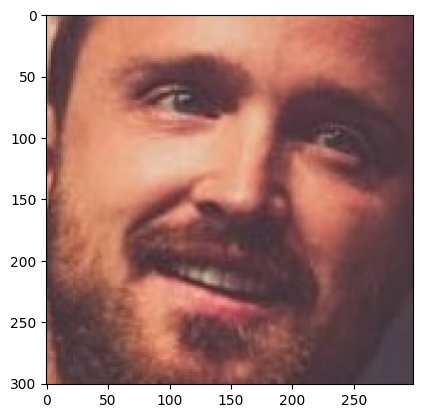

In [7]:
from matplotlib import pyplot
%matplotlib inline
image = load_image("PINS/pins_Aaron Paul/Aaron Paul0_262.jpg")
pyplot.imshow(image)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model



In [9]:
model = vgg_face()
model.load_weights("vgg_face_weights.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 226, 226, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                        

In [10]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [11]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 0s 222ms/step
(2622,)


In [12]:
def generate_embeddings():
  temp = []
  # Get embedding vector for first image in the metadata using the pre-trained model
  for i in metadata:
    try:
      img_path = i.image_path()
      img = load_image(img_path)

      # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
      img = (img / 255.).astype(np.float32)

      img = cv2.resize(img, dsize = (224,224))

      # Obtain embedding vector for an image
      # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
      embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except:
      embedding_vector = (100,)
      np.zeros(embedding_vector)
    temp.append(embedding_vector)
  return temp

embeddings = generate_embeddings()

1/1 [==============================] - 0s 108ms/step


In [13]:
print (embeddings[0].shape)

(2622,)


In [15]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

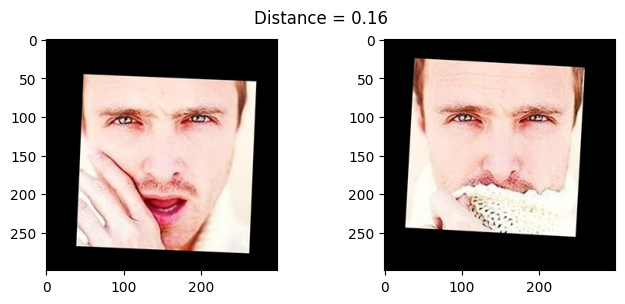

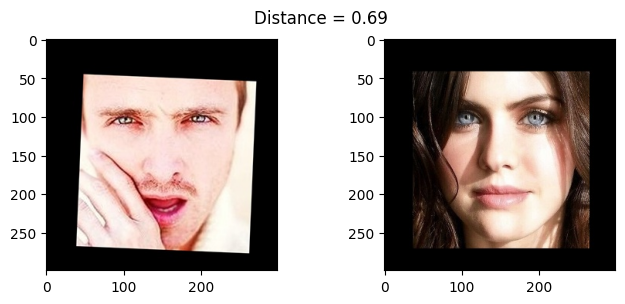

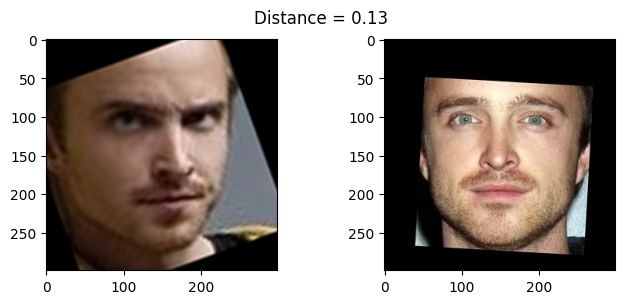

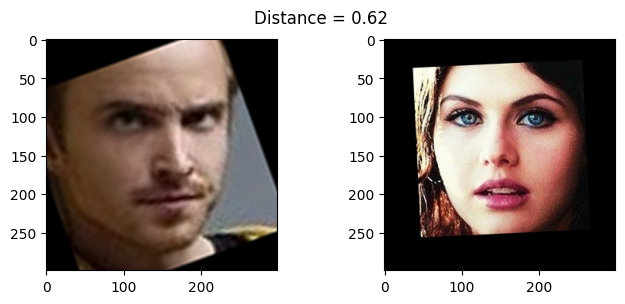

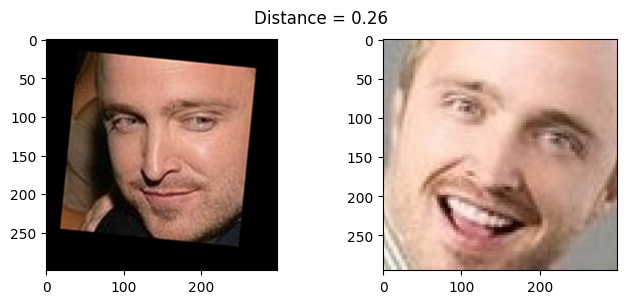

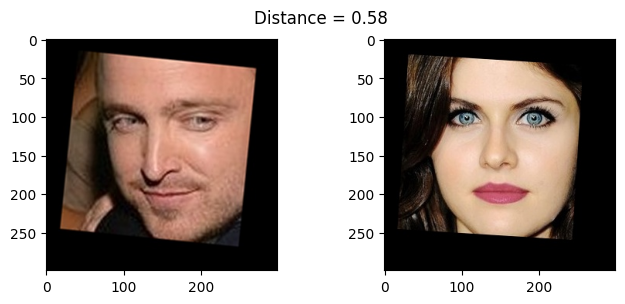

In [16]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

In [17]:
print(metadata[0].name)
print(metadata[0].file)
print(metadata[0].base)
print(metadata[0].image_path())
metadata.shape
np.shape(embeddings)

pins_Aaron Paul
Aaron Paul0_262.jpg
PINS
PINS\pins_Aaron Paul\Aaron Paul0_262.jpg


(10770, 2622)

In [18]:

import pandas as pd

metadata_panda = pd.DataFrame.from_records([m.to_dict() for m in metadata])
metadata_panda.head()

,base,name,file
0,PINS,pins_Aaron Paul,Aaron Paul0_262.jpg
1,PINS,pins_Aaron Paul,Aaron Paul101_247.jpg
2,PINS,pins_Aaron Paul,Aaron Paul101_248.jpg
3,PINS,pins_Aaron Paul,Aaron Paul101_249.jpg
4,PINS,pins_Aaron Paul,Aaron Paul103_217.jpg


In [19]:
metadata_panda.shape

(10770, 3)

In [20]:
y_labels = metadata_panda.name
X = embeddings

In [21]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(y_labels)
list(lb.classes_) 


['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman',
 'pins_Neil Patrick Harri

In [22]:
y = lb.transform(y_labels)
print (y)

[ 0  0  0 ... 99 99 99]


In [23]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
print(scaler.mean_)

[ 0.01083115 -0.0003015   0.00288542 ... -0.01445758  0.00593633
  0.01350415]


In [24]:
X_Scale = scaler.transform(X)
X_Scale.shape

(10770, 2622)

In [25]:
feat_cols = ['feature'+str(i) for i in range(X_Scale.shape[1])]
X_Scale_PD = pd.DataFrame(X_Scale,columns=feat_cols)
X_Scale_PD.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature2612,feature2613,feature2614,feature2615,feature2616,feature2617,feature2618,feature2619,feature2620,feature2621
10765,-0.244870,1.085116,-0.401905,-1.590587,0.060399,-1.341886,-0.031570,-1.302095,0.686571,-0.273018,...,1.647908,0.206650,1.210562,0.282649,0.886705,0.470015,-0.195510,-0.510768,1.141182,1.270609
10766,0.698677,1.622400,0.025510,-1.240740,-0.866262,-1.488615,-0.337909,0.674840,1.857631,-0.291803,...,2.428468,-0.356889,1.960229,0.252373,1.159026,1.329012,0.242675,0.270220,1.323309,1.379397
10767,-0.122590,0.341211,-1.556166,-1.254080,-0.932588,-0.104971,1.286731,-1.511075,0.138987,-0.930817,...,2.857825,0.677333,1.943114,1.150015,1.019401,0.754748,0.145984,0.011616,1.229719,1.957143
10768,-0.891053,0.105943,-0.793463,-1.784260,0.404004,-0.584435,-0.329624,-0.487679,-0.572746,0.273841,...,1.506853,0.546832,2.674037,0.218068,1.296721,1.206171,0.980880,-0.145508,0.433351,1.791353
10769,0.720621,0.928023,1.624953,-0.378482,-1.643791,1.839754,0.367405,1.000934,-0.274549,-1.294268,...,0.868664,0.749682,2.272752,-0.231914,2.128577,1.628988,-0.425253,-1.102726,2.537261,2.712355


In [26]:
from sklearn.decomposition import PCA

pca_ = PCA(n_components=128, whiten=True, svd_solver='full')
X_Scale_PCA = pca_.fit_transform(X_Scale)

print(pca_.explained_variance_ratio_)

[0.13578596 0.0538297  0.0397352  0.03678221 0.03398456 0.03142341
 0.02575682 0.02349445 0.02097759 0.01933878 0.0181939  0.01708215
 0.01657853 0.01563929 0.01424122 0.01365986 0.01308117 0.01222256
 0.01151444 0.01137169 0.01093338 0.0105759  0.00961126 0.00940025
 0.00908793 0.00882966 0.00837186 0.00766567 0.00761492 0.00734083
 0.00698957 0.00662849 0.00631611 0.00624185 0.00567873 0.00537243
 0.00529246 0.0051479  0.00503027 0.00486402 0.00442706 0.00432142
 0.00397452 0.00392458 0.0037013  0.00354279 0.00343043 0.0033419
 0.00327713 0.00318408 0.00313583 0.00307614 0.00290022 0.00281574
 0.00277691 0.00273382 0.00268874 0.00261534 0.00252342 0.00249668
 0.00237653 0.00231021 0.0022455  0.00216778 0.0021148  0.00205252
 0.00201388 0.0019365  0.00188935 0.00183077 0.00182522 0.00178559
 0.00175496 0.00172373 0.00168852 0.00165328 0.00163578 0.00161262
 0.00157201 0.00155721 0.00152902 0.00149522 0.00145711 0.00143343
 0.00141588 0.00137799 0.00135945 0.0013407  0.00131283 0.00129

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scale_PCA, y, test_size=0.10, random_state=1)

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e1, 1e2, 1e3],
              'gamma': [0.0001, 0.001, 0.003], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)

classifier = SVC()
classifier = classifier.fit(X_train, y_train)
print('params')
print(classifier.get_params)

pred_train = classifier.predict(X_train)

params
<bound method BaseEstimator.get_params of SVC()>


In [29]:
classifier.score(X_train, y_train)

0.9981429897864438

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print("Train Confusion Matrix = \n",mat_train)

Train Confusion Matrix = 
 [[ 80   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   0]
 [  0   0 108 ...   0   0   0]
 ...
 [  0   0   0 ...  90   0   0]
 [  0   0   0 ...   0 111   0]
 [  0   0   0 ...   0   0 101]]


In [31]:
pred_test = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.968430826369545

In [32]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test Confusion Matrix = \n",mat_test)

Test Confusion Matrix = 
 [[ 6  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  6]]


In [33]:
from sklearn import metrics
print("SVM = \n", metrics.classification_report(y_test, pred_test))

SVM = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        16
           4       1.00      0.89      0.94         9
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         9
           8       0.89      1.00      0.94         8
           9       1.00      1.00      1.00        13
          10       0.85      1.00      0.92        11
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        12
          13       1.00      0.50      0.67         4
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        11
          16       1.00      0.92      0.96        12
          17       

In [34]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 32

example_prediction = classifier.predict(X_test[example_idx].reshape(1,-1))
print(example_prediction)

[67]


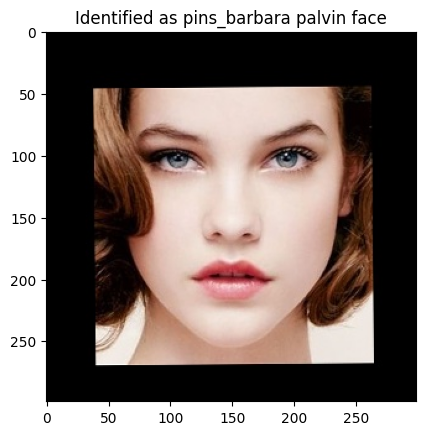

In [35]:
#had to do this because of did not save indices :(
metadata_train, metadata_test, y_train, y_test = train_test_split(metadata, y, test_size=0.10, random_state=1)
example_image = load_image(metadata_test[example_idx].image_path())

example_identity = lb.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [36]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 21

example_prediction = classifier.predict(X_test[example_idx].reshape(1,-1))
print(example_prediction)

[14]


Text(0.5, 1.0, 'Identified as pins_Chris Pratt')

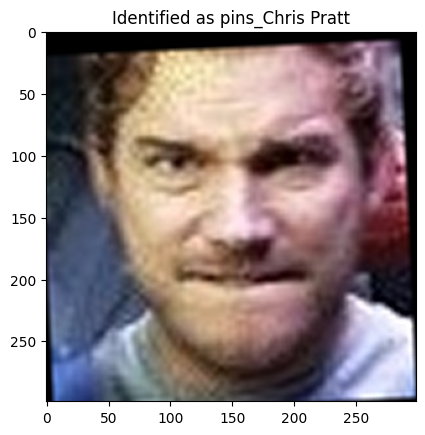

In [37]:
#had to do this because of did not save indices :(
metadata_train, metadata_test, y_train, y_test = train_test_split(metadata, y, test_size=0.10, random_state=1)
example_image = load_image(metadata_test[example_idx].image_path())

example_identity = lb.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}')